In [2]:
from labeling import Labeling
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Binance API parameters
traded_assets = ['BTC', 'ETH', 'ADA', 'DOGE']
stable_assets = ['USDT']
start_date = "Jan 01, 2021"
end_date = "Dec 31, 2021"
time_horizons = ['1hr', '12hr']

# EMA parameters
alpha_values = [0.5]

# labeling parameters
trend_reversal_factors = [0.3, 0.6]
change_tolerances = [0.5, 1]
forward_terms = [5, 8]
break_away_points = [1, 2]

In [6]:
# data parameters
for traded_asset in traded_assets:
    for stable_asset in stable_assets:
        for time_horizon in time_horizons:
            for alpha_value in alpha_values:
                # labeling parameters
                for trend_reversal_factor in trend_reversal_factors:
                    for change_tolerance in change_tolerances:
                        for forward_term in forward_terms:
                            for break_away_point in break_away_points:
                                df = pd.read_csv(f"data/{traded_asset}_{stable_asset}_{time_horizon}_{alpha_value}_ema.csv")

                                df_labeled = Labeling(
                                    df = df,
                                    alpha = alpha_value,
                                    trend_reverse_factor = trend_reversal_factor,
                                    change_tolerance = change_tolerance,
                                    forward_term = forward_term,
                                    break_away_point = 2
                                )

                                df_labeled.label_long_utility()
                                df = df_labeled.df

                                df.to_csv(f"data/labeled/{traded_asset}_{stable_asset}_{time_horizon}_{alpha_value}_{trend_reversal_factor}_{change_tolerance}_{forward_term}_{break_away_point}_long_utility.csv")

In [4]:
df

,open,close,closeTime,close_ema,close_time_parsed,position,long_utility
0,28923.63,28995.13,1.609463e+12,28995.130000,2021-01-01 00:59:59,1.0,0.000000
1,28995.13,29409.99,1.609466e+12,29271.703333,2021-01-01 01:59:59,NaN,-44.030476
2,29410.00,29194.65,1.609470e+12,29227.672857,2021-01-01 02:59:59,0.0,0.000000
3,29195.25,29278.40,1.609474e+12,29254.727333,2021-01-01 03:59:59,NaN,2509.971051
4,29278.41,29220.31,1.609477e+12,29236.963548,2021-01-01 04:59:59,NaN,2527.734836
...,...,...,...,...,...,...,...
8720,47203.16,47300.00,1.640902e+12,47358.071517,2021-12-30 21:59:59,NaN,NaN
8721,47299.99,47084.88,1.640905e+12,47221.475759,2021-12-30 22:59:59,NaN,NaN
8722,47084.88,47120.87,1.640909e+12,47171.172879,2021-12-30 23:59:59,NaN,NaN
8723,47120.88,47073.98,1.640912e+12,47122.576440,2021-12-31 00:59:59,NaN,NaN


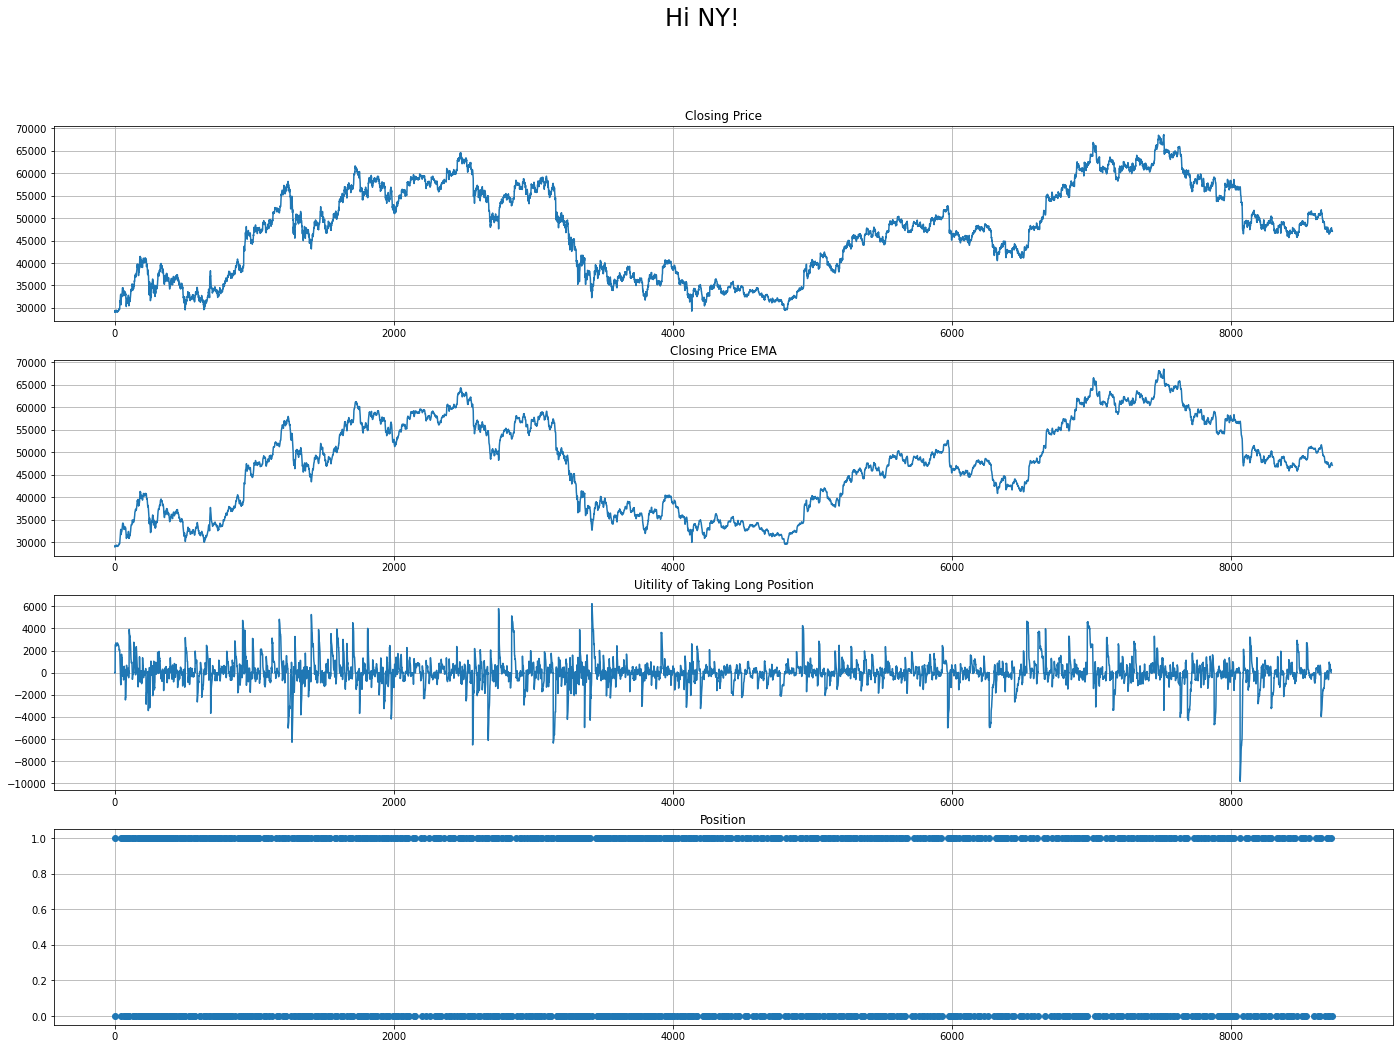

In [7]:
traded_asset = 'BTC'#, 'ETH', 'ADA', 'DOGE'
stable_asset = 'USDT'
start_date = "Jan 01, 2021"
end_date = "Dec 31, 2021"
time_horizon = '1hr'#, '12hr'

# EMA parameters
alpha_value = 0.5

# labeling parameters
trend_reversal_factors = 0.3#, 0.6
change_tolerances = 0.5#, 1
forward_terms = 5#, 8
break_away_points = 1#, 2

fig = plt.figure(
    figsize=(24, 16.54),
    facecolor="#ffffff",
)

fig.suptitle("Hi NY!", fontsize=24)

plt.subplot(411)
plt.plot(df['close'])
plt.title('Closing Price')
plt.grid()

plt.subplot(412)
plt.plot(df['close_ema'])
plt.title('Closing Price EMA')
plt.grid()

plt.subplot(413)
plt.plot(df['long_utility'])
plt.title('Uitility of Taking Long Position')
plt.grid()

plt.subplot(414)
plt.plot(df['position'], 'o')
plt.title('Position')
plt.grid()